In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
def analyze_file(filename):
    df = pd.read_csv(filename, sep='\t', skiprows=1, dtype=float)
    df['x'] *= 0.22
    df['y'] *= 0.22
    df['vx'] = 15. * np.diff(df.get('x'),prepend=0.)
    df['vy'] = 15. * np.diff(df.get('y'),prepend=0.)
    df['v_sq'] = df['vx'] ** 2 + df['vy'] ** 2
    return df

# Matrise med indekser x, y, vx, vy, v_sq som første dim.
df = np.asarray(pd.concat([dfs for dfs in [analyze_file(os.path.join('data', file)) for file in os.listdir('data')]])).T


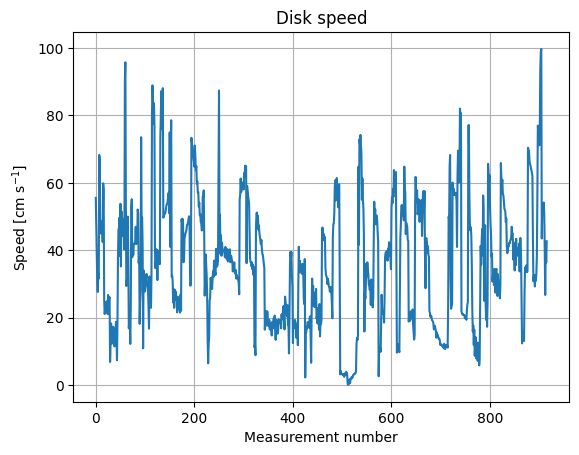

In [158]:
plt.plot(np.sqrt(df[-1])[df[-1] < 10000])
plt.xlabel('Measurement number')
plt.ylabel('Speed [cm s$^{-1}$]')
plt.title('Disk speed')
plt.grid()
plt.show()